# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [825]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.style.use("seaborn") #setting plot style

In [826]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [827]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:

<img src="figures/dataset.png" width="600"/>

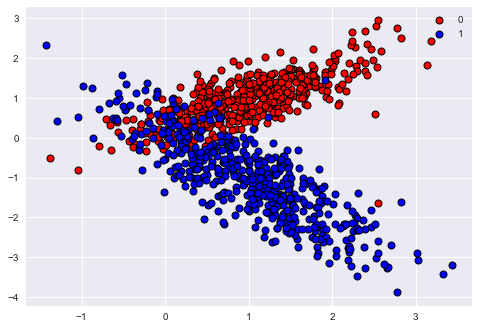

In [828]:
### WRITE YOUR CODE HERE ###
red = [] #list to collect all vectors with the label 0
blue = [] #list to collect all vectors with the label 1
for i in range(0,y.size): #loop through labels
    if (y[i] == 0): #check if label of the vector is 0
        red.append(X[i]) #label of the vector is 0
        continue
    blue.append(X[i]) #label of the vector is 1
red = np.array(red) #cast to numpy array
blue = np.array(blue) #cast to numpy array
#make scatter plot for the vectors with the label 0
plt.scatter(red[:,0],red[:,1], color="red", edgecolor="black", linewidth=1, label="0")
#make scatter plot for the vectors with the label 1
plt.scatter(blue[:,0],blue[:,1], color="blue", edgecolor="black", linewidth=1, label="1")
plt.legend(loc="upper right") #add legend
plt.show() #display the plot

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [829]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [830]:
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
clf.fit(X_train,y_train) #train model
y_pred = clf.predict(X_test) #make prediction
misses = 0 #variable to count misses of the model
for i in range(0,y_test.size): #loop through labels
    if y_pred[i] != y_test[i]: #check if prediction is wrong
        misses += 1 #prediction was wrong and we count one miss
"""
The model has a good accuracy by default
and it does not suffer from the overfitting
problem, because it takes the average of
multiple decision trees, which cancels out
the bias.
"""
print("The model predicted:", misses, "samples wrong from a total of:", X_test.size, "samples.")


The model predicted: 23 samples wrong from a total of: 660 samples.


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [831]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

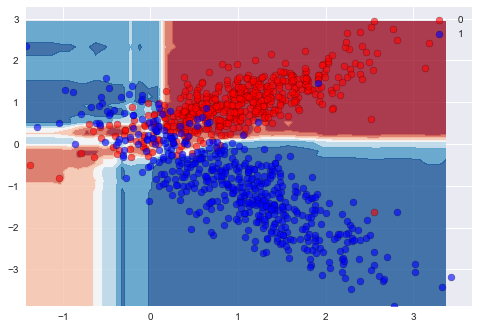

In [832]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:

<img src="figures/num_trees.png" width="600"/>

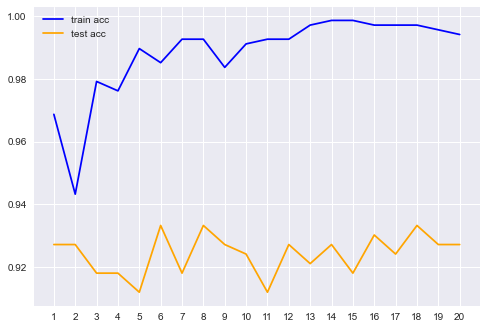

In [833]:
### WRITE YOUR CODE HERE ###
def accuracy(pred, true):
    misses = 0 #variabe to count misses
    for i in range(0,pred.size): #loop through prediction
        if (pred[i] != true[i]): #check if prediction was wrong
            misses += 1 #prediction was wrong and we count one miss
    return (pred.size - misses) / pred.size #calculate accuracy

acc_train = [] #y axis
acc_test = [] #y axis
number_of_trees = [] #x axis
for i in range(1,21): #loop through wanted amount of trees
    clf = RandomForestClassifier(n_estimators=i) #create model with i-amount of tress
    number_of_trees.append(str(i)) #add number of trees used to the x axis
    clf.fit(X_train, y_train) #train model
    pred_train = clf.predict(X_train) #use model to make prediction on the training data
    pred_test = clf.predict(X_test) #use model to make prediction on the test data
    acc_train.append(accuracy(pred_train, y_train)) #add the accuracy on the training data to the list
    acc_test.append(accuracy(pred_test, y_test)) #add the accuracy on the test data to the list
number_of_trees = np.array(number_of_trees) #cast to numpy array
acc_train = np.array(acc_train) #cast to numpy array
acc_test = np.array(acc_test) #cast to numpy array
plt.plot(number_of_trees,acc_train,color="blue",label="train acc") #plot the accuracy on the training data
plt.plot(number_of_trees,acc_test,color="orange",label="test acc") #plot the accuracy on the test data
plt.legend(loc="upper left") #add legend
plt.show() #display the plot


<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

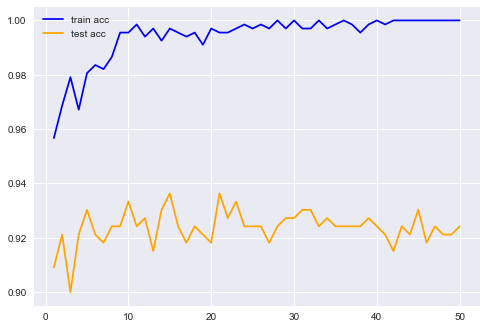

In [834]:
### WRITE YOUR CODE HERE ###
acc_train = [] #y axis
acc_test = [] #y axis
number_of_trees = [] #x axis
for i in range(1,51): #loop through wanted amount of trees
    clf = RandomForestClassifier(n_estimators=i) #create model with i-amount of tress
    number_of_trees.append(i) #add number of trees used to the x axis
    clf.fit(X_train, y_train) #train model
    pred_train = clf.predict(X_train) #use model to make prediction on the training data
    pred_test = clf.predict(X_test) #use model to make prediction on the test data
    acc_train.append(accuracy(pred_train, y_train)) #add the accuracy on the training data to the list
    acc_test.append(accuracy(pred_test, y_test)) #add the accuracy on the test data to the list
number_of_trees = np.array(number_of_trees) #cast to numpy array
acc_train = np.array(acc_train) #cast to numpy array
acc_test = np.array(acc_test) #cast to numpy array
plt.plot(number_of_trees,acc_train,color="blue",label="train acc") #plot the accuracy on the training data
plt.plot(number_of_trees,acc_test,color="orange",label="test acc") #plot the accuracy on the test data
plt.legend(loc="upper left") #add legend
plt.show() #display the plot


<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:

<img src="figures/max_depth.png" width="600"/>

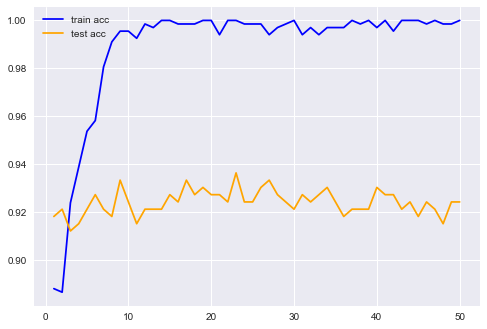

In [835]:
### WRITE YOUR CODE HERE ###
acc_train = [] #y axis
acc_test = [] #y axis
depth = [] #x axis
for i in range(1,51): #loop through wanted amount of trees
    clf = RandomForestClassifier(n_estimators=30, max_depth=i) #create model with i-amount of tress
    depth.append(i) #add number of trees used to the x axis
    clf.fit(X_train, y_train) #train model
    pred_train = clf.predict(X_train) #use model to make prediction on the training data
    pred_test = clf.predict(X_test) #use model to make prediction on the test data
    acc_train.append(accuracy(pred_train, y_train)) #add the accuracy on the training data to the list
    acc_test.append(accuracy(pred_test, y_test)) #add the accuracy on the test data to the list
depth = np.array(depth) #cast to numpy array
acc_train = np.array(acc_train) #cast to numpy array
acc_test = np.array(acc_test) #cast to numpy array
plt.plot(depth,acc_train,color="blue",label="train acc") #plot the accuracy on the training data
plt.plot(depth,acc_test,color="orange",label="test acc") #plot the accuracy on the test data
plt.legend(loc="upper left") #add legend
plt.show() #display the plot

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [836]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 5:</b>

Create a data set containing only the numeric values.

In [837]:
### WRITE YOUR CODE HERE ###
numerical_df = churn_df.select_dtypes(include=np.number) #creating dataframe with only numeric values
numerical_df.head() #display the first 5 row of the new dataframe

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):

<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

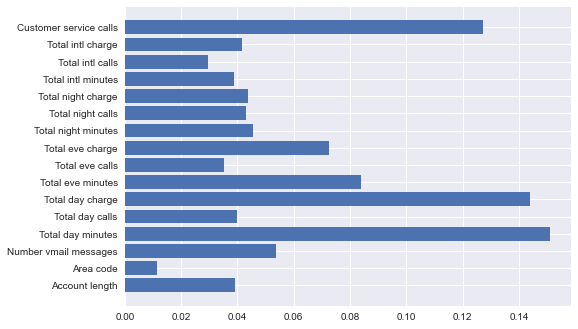

In [838]:
### WRITE YOUR CODE HERE ###
clf = RandomForestClassifier()
clf.fit(numerical_df, label)
plt.barh(numerical_df.columns,clf.feature_importances_)
plt.show()


<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [839]:
### WRITE YOUR CODE HERE ###
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_features=10,random_state=1) #generating easy regression data set with 10 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42) #split the data in train and test data
clf = RandomForestRegressor() #create model
clf.fit(X_train, y_train) #train model
test_pred = clf.predict(X_test) #prediction on test data
train_pred = clf.predict(X_train) #prediction on training data
"""
The smaller the mean squared error, the closer we are to finding the line of best fit.
Depending on the data, it may be impossible to get a very small value for the mean squared error.
For example, the data is scattered widly around the regression line.
"""
#calculate error for training data
print("Mean squared error for the training data:",mean_squared_error(y_true=y_train,y_pred=train_pred))
#calculate error for test data
print("Mean squared error for the test data:",mean_squared_error(y_true=y_test,y_pred=test_pred))

Mean squared error for the training data: 1806.5169745445999
Mean squared error for the test data: 6085.735275595688
